In [1]:
using Revise
using NonEqDigits

Precompiling packages...
   5818.8 ms  ✓ NonEqDigits
  1 dependency successfully precompiled in 7 seconds. 351 already precompiled.
[ Info: Precompiling NonEqDigits [b54bc958-a1aa-42b9-8f67-21320138491b]


In [2]:
using GLMakie
using CairoMakie
using JLD2
using GraphvizDotLang: attr
using GraphvizDotLang

In [133]:
single_col_width = 324 # corresponds to 3+3/8 in as state in PR guidelines
double_col_width = single_col_width*2
golden_ratio = 1.618
nothing

# Figure 2 V2

In [398]:
includet("../scripts/ned_ca_s1_stats.jl")

In [399]:
function prep_p1(rules;
        size=(double_col_width, double_col_width/golden_ratio),
        kwargs...
    )
    fig = Figure(; size)
    ax = Axis(fig[1,1];
        xticks = (1:length(rs), string.(rs)),
        xticklabelsize=8.,
        xticklabelrotation=pi/2,
        xgridvisible=false,
        xautolimitmargin = (0.01, 0.01),
        xlabel="Rule",
        kwargs...
    )

    fig, ax
end

prep_p1 (generic function with 1 method)

In [402]:
L = 6
rs = ca_ucodes_f1()
# rs = 0:255
mas = MolAut.(L, rs;
    # reduced=true
    reduced=false
)

numenz = ca_numenzymes.(rs)
numacs = [length(attracting_components(ma.mg)) for ma in mas]
Nac = []
Nsingle = []
Neq = []
Nneq = []
for ma in mas
    acs = attracting_components(ma.mg)
    push!(Nac, length(acs))
    acis_single, acis_eq, acis_neq, _, _ = classify_acs_s1_stats(ma.mg, acs)
    push!(Nsingle, length(acis_single))
    push!(Neq, length(acis_eq))
    push!(Nneq, length(acis_neq))
end

sp = sortperm(collect(zip(.- Nac, .- Nsingle, .- Neq)))

pos = 1:length(rs)
rs = rs[sp]
numacs = numacs[sp]
numenz = numenz[sp]
Nac = Nac[sp]
Nsingle = Nsingle[sp]
Neq = Neq[sp]
Nneq = Nneq[sp]
nothing

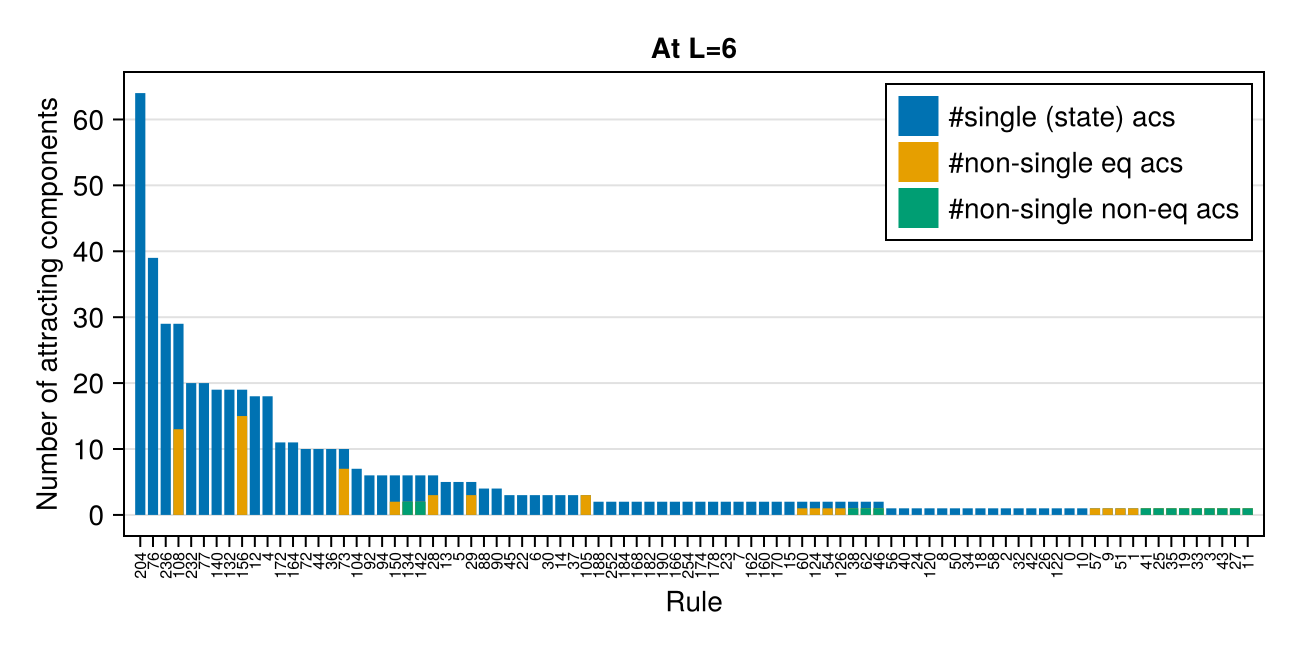

In [404]:
f, ax = prep_p1(rs;
    size=(double_col_width, double_col_width/2),
    # yscale=log10
)
ax.title = "At L=$L"
ax.ylabel = "Number of attracting components"
barplot!(ax, pos, Nsingle .+ Neq .+ Nneq;
    color=Makie.wong_colors()[1],
    alpha=1.,
    label="#single (state) acs",
)
barplot!(ax, pos, Neq .+ Nneq;
    color=Makie.wong_colors()[2],
    alpha=1.,
    label="#non-single eq acs",
)
barplot!(ax, pos, Nneq;
    color=Makie.wong_colors()[3],
    alpha=1.,
    label="#non-single non-eq acs",
)
axislegend(ax)

# ylims!(ax, (0.0, 40))

save("../data/fig2/stackedbars.pdf", f)
f

# Figure 2 V1

In [163]:
includet("../scripts/ned_ca_s1_stats.jl")

In [386]:
function prep_p1(rules;
        size=(double_col_width, double_col_width/golden_ratio),
        kwargs...
    )
    fig = Figure(; size)
    ax = Axis(fig[1,1];
        xticks = (1:length(rs), string.(rs)),
        xticklabelsize=8.,
        xticklabelrotation=pi/2,
        xgridvisible=false,
        xautolimitmargin = (0.01, 0.01),
        xlabel="Rule",
        kwargs...
    )

    fig, ax
end

prep_p1 (generic function with 1 method)

In [395]:
L = 6
rs = ca_ucodes_f1()
# rs = 0:255
mas = MolAut.(L, rs;
    reduced=true
    # reduced=false
)

numenz = ca_numenzymes.(rs)
numacs = [length(attracting_components(ma.mg)) for ma in mas]
Nac = []
Nsingle = []
Neq = []
Nneq = []
for ma in mas
    acs = attracting_components(ma.mg)
    push!(Nac, length(acs))
    acis_single, acis_eq, acis_neq, _, _ = classify_acs_s1_stats(ma.mg, acs)
    push!(Nsingle, length(acis_single))
    push!(Neq, length(acis_eq))
    push!(Nneq, length(acis_neq))
end

sp = sortperm(collect(zip(.- Nac, .- Nsingle, .- Neq)))

pos = 1:length(rs)
rs = rs[sp]
numacs = numacs[sp]
numenz = numenz[sp]
Nac = Nac[sp]
Nsingle = Nsingle[sp]
Neq = Neq[sp]
Nneq = Nneq[sp]
nothing

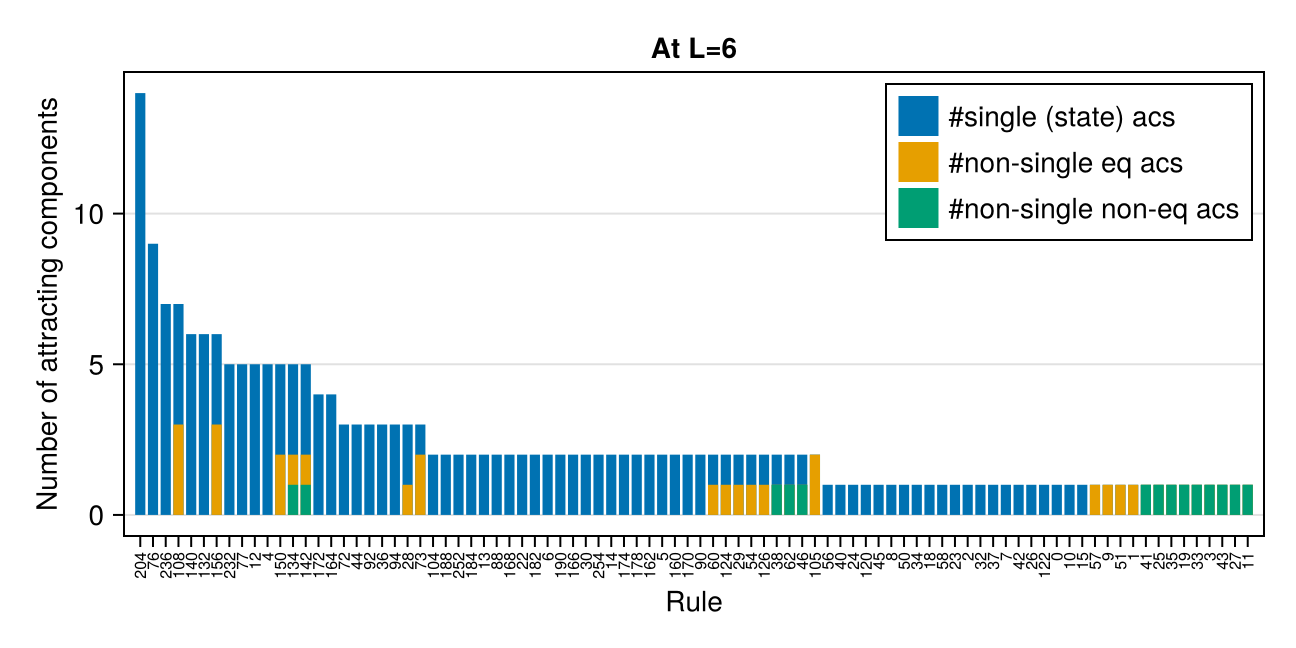

In [396]:
f, ax = prep_p1(rs;
    size=(double_col_width, double_col_width/2),
    # yscale=log10
)
ax.title = "At L=$L"
ax.ylabel = "Number of attracting components"
barplot!(ax, pos, Nsingle .+ Neq .+ Nneq;
    color=Makie.wong_colors()[1],
    alpha=1.,
    label="#single (state) acs",
)
barplot!(ax, pos, Neq .+ Nneq;
    color=Makie.wong_colors()[2],
    alpha=1.,
    label="#non-single eq acs",
)
barplot!(ax, pos, Nneq;
    color=Makie.wong_colors()[3],
    alpha=1.,
    label="#non-single non-eq acs",
)
axislegend(ax)

# ylims!(ax, (0.0, 40))

save("stackedbars.pdf", f)
f

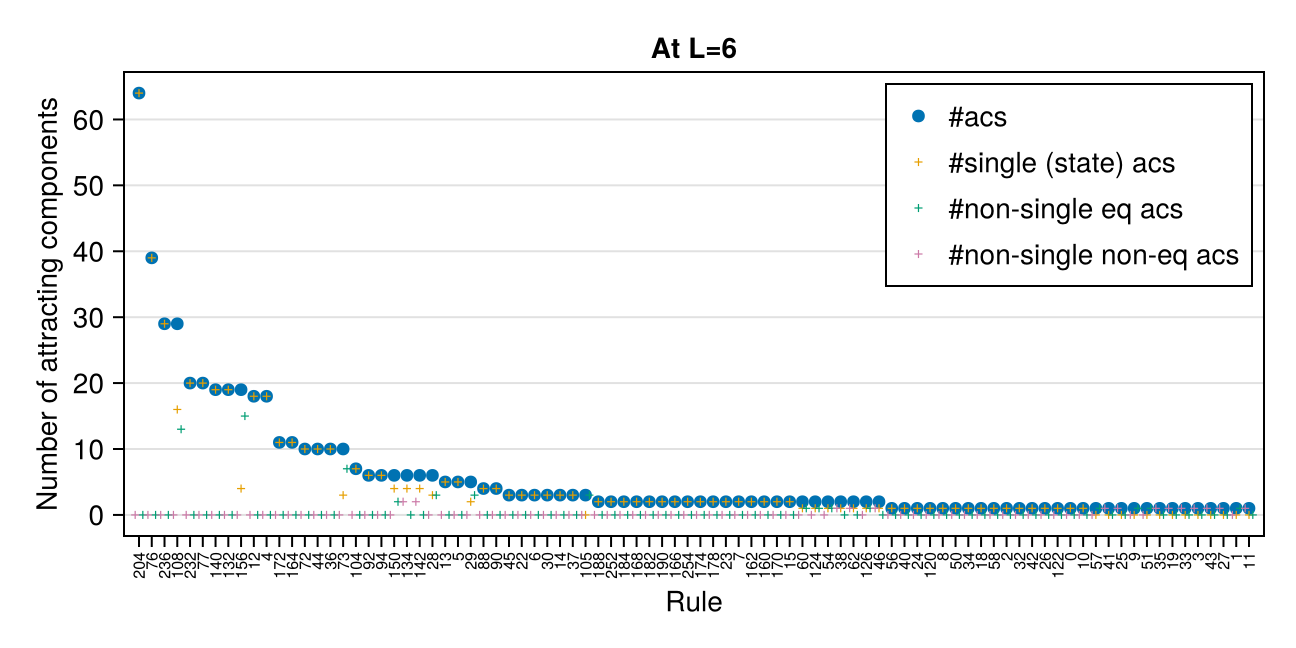

In [384]:
f, ax = prep_p1(rs;
    size=(double_col_width, double_col_width/2),
    # yscale=log10
)
ax.title = "At L=$L"
ax.ylabel = "Number of attracting components"
sc = scatter!(ax, pos, Nac;
    label="#acs"
    # color=numenz,
    # colormap=Categorical(:tab20)
    # marker='+'
)
sc = scatter!(ax, pos, Nsingle;
    label="#single (state) acs",
    marker='+'
)
sc = scatter!(ax, pos .+ 0.3, Neq;
    label="#non-single eq acs",
    marker='+'
)
sc = scatter!(ax, pos .- 0.3, Nneq;
    label="#non-single non-eq acs",
    marker='+'
)

axislegend(ax)
# Colorbar(f[1,2], sc)

save("scatter.pdf", f)
f

In [80]:
ax.limits

Observable{Any}((nothing, nothing))
    0 => (::Makie.var"#1751#1782")(::Any) @ Makie ~/.julia/packages/Makie/FUAHr/src/makielayout/blocks/axis.jl:499


In [26]:
numacs[sp]

88-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 4
 4
 5
 5
 5
 5
 5
 5
 5
 6
 7
 8

In [4]:
typeof(mg)

LoadError: UndefVarError: `mg` not defined

# Bits and bobs

In [3]:
GC.gc()
empty!(Out)
GC.gc()